#### PIMA Indian Diabetes Dataset
Dataset can be found here: https://www.kaggle.com/uciml/pima-indians-diabetes-database

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

### Module section

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV


In [3]:
df= pd.read_csv("C:/Users/elias/Desktop/PIMA/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

### Data Cleaning and preprocessing 

In [ ]:
# check how many null values is there 

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

NB: There is no null value in our dataset 

### Exploratory Data Analysis (EDA)

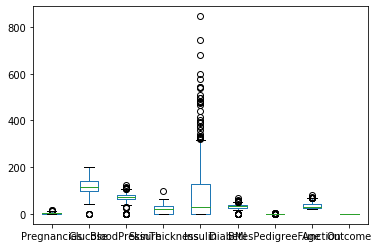

In [6]:
df.plot(kind='box')
plt.show()

In [7]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Let's check the total pregnancy 

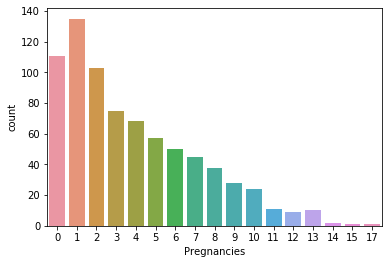

In [9]:
plot = sns.countplot(df["Pregnancies"])

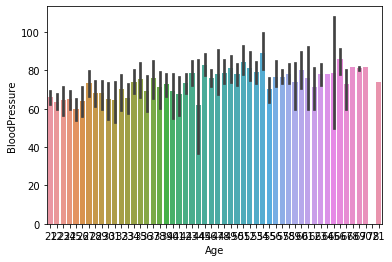

In [10]:
plot = sns.barplot(x=df["Age"], 
                   y=df["BloodPressure"])

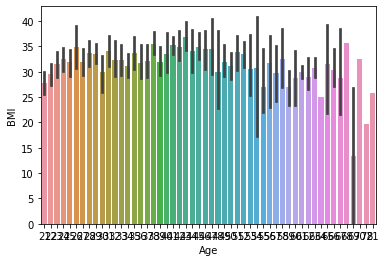

In [9]:
plot = sns.barplot(x=df["Age"], 
                   y=df["BMI"])

#### Add heatmap

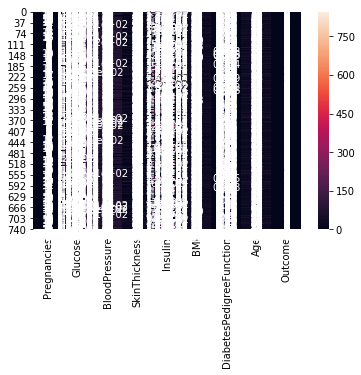

In [10]:
sns.heatmap(df, annot=True)

#### Add Clustermap

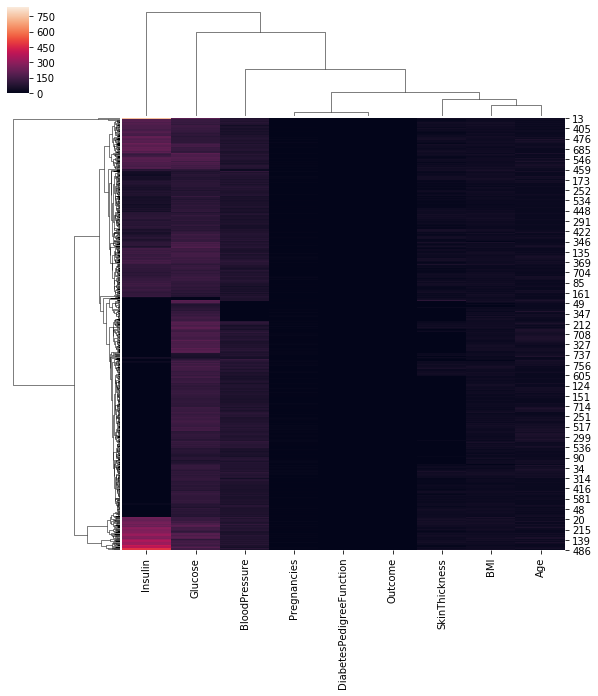

In [12]:
sns.clustermap(df)

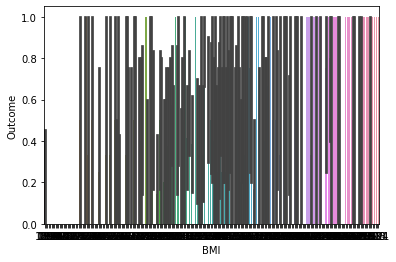

In [13]:
plot = sns.barplot(x=df["BMI"], 
                   y=df["Outcome"])

#### Let's make some distribution plot

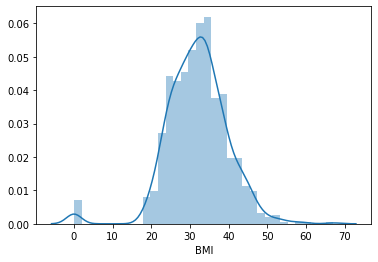

In [16]:
plot = sns.distplot(df["BMI"],
                    hist=True)

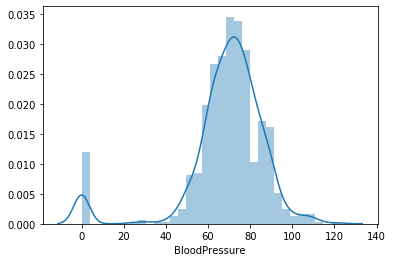

In [17]:
plot = sns.distplot(df["BloodPressure"],
                    hist=True)

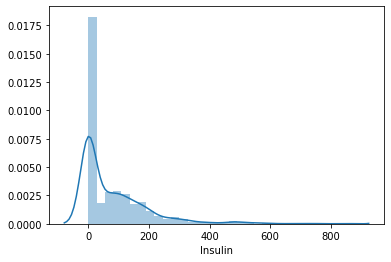

In [18]:
plot = sns.distplot(df["Insulin"],
                    hist=True)

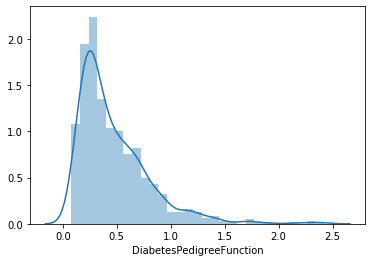

In [19]:
plot = sns.distplot(df["DiabetesPedigreeFunction"],
                    hist=True)

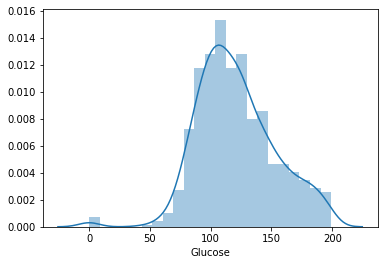

In [21]:
plot = sns.distplot(df["Glucose"],
                    hist=True)

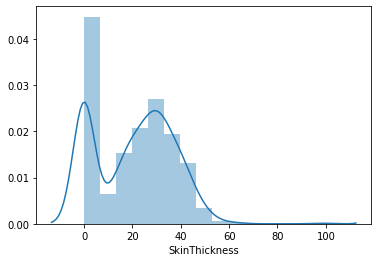

In [22]:
plot = sns.distplot(df["SkinThickness"],
                    hist=True)

#### Define the independent and dependent features 

In [11]:
input_data= df.drop('Outcome', axis='columns')
target= df['Outcome']
#input_data

#### Train test split 

In [12]:
X_train, X_test, y_train, y_test= train_test_split(input_data,target, test_size=0.8, random_state=4)

#### Apply LogisticRegression Algorithm

In [13]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train, y_train)

C:\Users\elias\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Accuracy Report 

In [14]:
print('Coefficients:', logistic_regression.coef_)
print('Intercept:', logistic_regression.intercept_)
 
predictions = logistic_regression.predict(X_test)
print('Classification Report:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test,predictions ))

Coefficients: [[ 0.14622312  0.01896084 -0.01871373  0.0239448  -0.00318173  0.01554609
   0.82339528 -0.01201933]]
Intercept: [-2.92473541]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82       399
           1       0.72      0.45      0.55       216

    accuracy                           0.74       615
   macro avg       0.74      0.68      0.69       615
weighted avg       0.74      0.74      0.73       615

Confusion Matrix:
 [[361  38]
 [119  97]]
Accuracy Score: 0.7447154471544716
Precision: 0.7185185185185186
Recall: 0.44907407407407407


#### Confusion matrix for LR model 

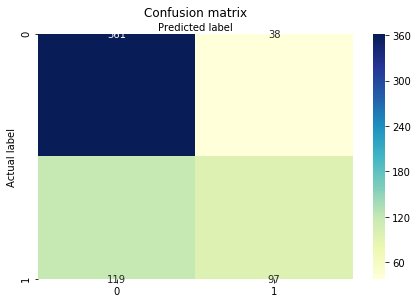

In [15]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
###create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predictions)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Another way to determine how good the performance of different classification models is is the ROC-AUC curve. ROC stands for Receiver Operating Curve and AUC stands for Area Under Curve. The blue line in the picture below is ROC, and the space below this ROC is AUC. The higher the value of ROC i.e. the closer the blue line goes to the top (1), the better our model is.

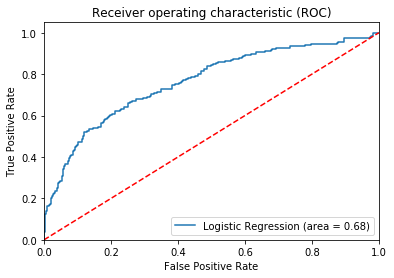

In [16]:
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [17]:
new_observation = [[7, 140, 60, 40, 7, 20.6, 0.627, 51]]
logistic_regression.predict(new_observation)

array([1], dtype=int64)

#### Apply Decision Tree algorithm 

In [18]:
model_decision_tree=DecisionTreeClassifier()
model_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Accuracy Report 

In [19]:
tree_predictions = model_decision_tree.predict(X_test)
print('Classification Report:\n',classification_report(y_test, tree_predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, tree_predictions))
print('Accuracy Score:',accuracy_score(y_test, tree_predictions))
print("Precision:",metrics.precision_score(y_test, tree_predictions))
print("Recall:",metrics.recall_score(y_test,tree_predictions ))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75       399
           1       0.55      0.64      0.59       216

    accuracy                           0.69       615
   macro avg       0.67      0.68      0.67       615
weighted avg       0.70      0.69      0.69       615

Confusion Matrix:
 [[284 115]
 [ 77 139]]
Accuracy Score: 0.6878048780487804
Precision: 0.547244094488189
Recall: 0.6435185185185185


#### Confusion Matrix 

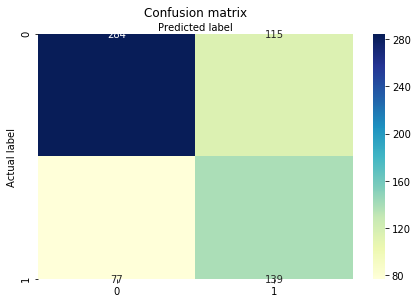

In [20]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
###create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, tree_predictions)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### ROC-AUC Curve 

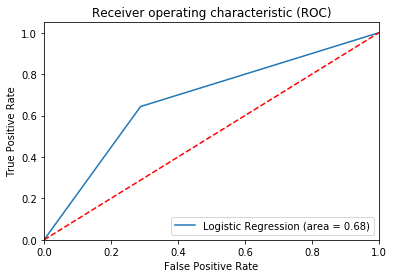

In [21]:
tree_roc_auc = roc_auc_score(y_test, model_decision_tree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_decision_tree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Dec_ROC')
plt.show()

#### Apply RandomForest classifier 

In [22]:
random_forest = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### Accuracy Model Report 

In [23]:
random_pred = random_forest.predict(X_test)
print(classification_report(y_test, random_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, random_pred)))
print('Confusion Matrix:\n',confusion_matrix(y_test, random_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       399
           1       0.63      0.49      0.55       216

    accuracy                           0.72       615
   macro avg       0.69      0.67      0.67       615
weighted avg       0.71      0.72      0.71       615


Accuracy: 0.7203
Confusion Matrix:
 [[338  61]
 [111 105]]


#### Confusion Matrix 

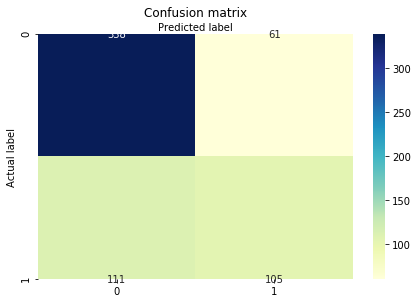

In [24]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

###create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, random_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### ROC-AUC Curve 

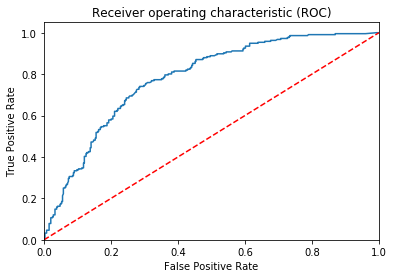

In [25]:
rf_roc_auc = roc_auc_score(y_test, random_forest.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, random_forest.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.savefig('ranf_ROC')
plt.show()

#### Hyper Parameter Tuning 

In [26]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }   
 

}

In [27]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(input_data, target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.766927,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.739583,{'n_estimators': 10}
2,logistic_regression,0.768229,{'C': 1}
3,naive_bayes_gaussian,0.751302,{}
4,naive_bayes_multinomial,0.593750,{}
5,decision_tree,0.709635,{'criterion': 'gini'}
